# Pandas problems
https://www.practiceprobs.com/problemsets/python-pandas/series/baby-names/

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### P1: Babynames vote
You and your spouse decided to let the internet name your next child. You’ve asked the great people of the web to submit their favorite names, and you’ve compiled their submissions into a Series called babynames
Determine how many people voted for the names ‘Chad’, ‘Ruger’, and ‘Zeltron’

In [3]:


babynames = pd.Series([
    'Jathonathon', 'Zeltron', 'Ruger', 'Phreddy', 'Ruger', 'Chad', 'Chad',
    'Ruger', 'Ryan', 'Ruger', 'Chad', 'Ryan', 'Phreddy', 'Phreddy', 'Phreddy',
    'Mister', 'Zeltron', 'Ryan', 'Ruger', 'Ruger', 'Jathonathon',
    'Jathonathon', 'Ruger', 'Chad', 'Zeltron'], dtype='string')

In [4]:
babynames.value_counts().loc[['Ruger', 'Chad', 'Zeltron']]

Ruger      7
Chad       4
Zeltron    3
Name: count, dtype: Int64

#### Bees Knees Problem
Given, two Series bees and knees, if the ith value of bees is NaN, double the ith value inside knees.

In [5]:
bees = pd.Series([True, True, False, np.nan, True, False, True, np.nan])
knees = pd.Series([5,2,9,1,3,10,5,2], index = [7,0,2,6,3,5,1,4])

In [6]:
# knees.loc[pd.isna(bees).to_numpy()] *= 2 In newer Pandas versions (v1.3.0+), using .loc with a boolean array requires index alignment, 
# not just positional matching.

In [7]:
knees.loc[bees[bees.isna()].index.to_numpy()] *=2

In [8]:
print(knees)

7    10
0     2
2     9
6     1
3     6
5    10
1     5
4     2
dtype: int64


#### Car Shopping Problem (To learn)
After accidentally leaving an ice chest of fish and shrimp in your car for a week while you were on vacation, you’re now in the market for a new vehicle 🚗. Your insurance didn’t cover the loss, so you want to make sure you get a good deal on your new car.

Given a Series of car asking_prices and another Series of car fair_prices, determine which cars for sale are a good deal. In other words, identify cars whose asking price is less than their fair price.

The result should be a list of integer indices corresponding to the good deals in asking_prices.

In [9]:
asking_prices = pd.Series([5000, 7600, 9000, 8500, 7000], index=['civic', 'civic', 'camry', 'mustang', 'mustang'])
fair_prices = pd.Series([5500, 7500, 7500], index=['civic', 'mustang', 'camry'])

In [10]:
deals =(asking_prices - fair_prices)

In [11]:
good_deals = deals[deals<0]
good_deals

civic     -500
mustang   -500
dtype: int64

In [12]:
all_fair_prices = fair_prices.loc[asking_prices.index]
off_market_prices = asking_prices - all_fair_prices
below_fair_prices  = (off_market_prices < 0).reset_index(drop=True)
below_fair_prices.loc[below_fair_prices].index.to_list()

[0, 4]

In [13]:
# Using pandas dataframe

# Creating merged table

market = asking_prices.to_frame().rename(columns= {0: 'asking_prices'}).merge( 
    fair_prices.to_frame(), how= 'left', left_index= True, right_index= True).rename(
    columns= {0: 'fair_prices'}
).reset_index()
market

,index,asking_prices,fair_prices
0,civic,5000,5500
1,civic,7600,5500
2,camry,9000,7500
3,mustang,8500,7500
4,mustang,7000,7500


In [14]:
market[market.asking_prices < market.fair_prices].index.to_list()

[0, 4]

#### Price Gouging Problem
You suspect your local grocery’s been price gouging the ground beef. You and some friends decide to track the price of ground beef every day for 10 days. You’ve compiled the data into a Series called beef_prices, whose index represents the day of each recording.

For example, beef was priced 3.37 on the first day, 4.64 on the second day, etc.

Determine which day had the biggest price increase from the prior day.

In [15]:
generator = np.random.default_rng(123)
beef_prices = pd.Series(
    data = np.round(generator.uniform(low=3, high=5, size=10), 2),
    index = generator.choice(10, size=10, replace=False)
)

In [16]:
print(beef_prices)

4    4.36
8    3.11
2    3.44
0    3.37
6    3.35
9    4.62
3    4.85
5    3.55
1    4.64
7    4.78
dtype: float64


In [17]:
beef_prices.sort_index(inplace= True)
beef_prices_prev = beef_prices.shift(periods = 1 )
beef_price_increase = beef_prices - beef_prices_prev
beef_price_increase.idxmax()

9

#### Fair Teams Problem (To learn)
You’re organizing a competitive rock-skipping league. 6 coaches and 20 players have signed up. Your job is to randomly and fairly determine the teams, assigning players to coaches. Keep in mind that some teams will have three players and some teams will have four players. Given a Series of coaches and a Series of players, create a Series of random coach-to-player mappings. The resulting Series should have coach names in its index and corresponding player names in its values.


Result:
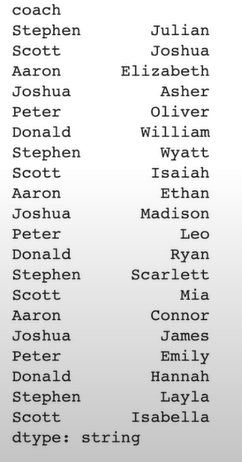

In [18]:
coaches = pd.Series(['Aaron', 'Donald', 'Joshua', 'Peter', 'Scott', 'Stephen'], dtype='string')
players = pd.Series(['Asher', 'Connor', 'Elizabeth', 'Emily', 'Ethan', 'Hannah', 'Isabella', 'Isaiah', 'James',
                     'Joshua', 'Julian', 'Layla', 'Leo', 'Madison', 'Mia', 'Oliver', 'Ryan', 'Scarlett', 'William',
                     'Wyatt'], dtype='string')

In [19]:
# There are three possible approaches to this problem:
# 1. Shuffling & Assigning Sequentially (Round-Robin)

# Shuffle both players and coaches.
# Assign players in a round-robin way.
# Using numpy.ceil to Repeat Coaches (Previous Solution)

# 2. Shuffle both lists (Simple implementation along with unusual move)
# Repeat coaches just enough to match the players.
# Assign players based on the repeated coach list.

#3. Grouping after Shuffling (Common place in P&C)

#  Shuffle players and coaches.
# Divide players into equal groups.
# Assign each group to a coach.

# I prefer approach 2 for simplicity but for some practical reasons approach 3 will be preferred where skill, speciality and preference plays a role

In [20]:
# Approach 2
shuffled_c = coaches.sample(frac= 1, random_state= 986).reset_index(drop= True)
shuffled_p = players.sample(frac= 1, random_state= 986).reset_index(drop= True)

In [21]:
# Let's make coaches series elongated to match player length
repeat_c =pd.concat([shuffled_c]*np.ceil(len(players)/len(coaches)).astype('int64')).head(len(players))
print(repeat_c, "\n", len(repeat_c))

0      Aaron
1      Peter
2     Donald
3      Scott
4    Stephen
5     Joshua
0      Aaron
1      Peter
2     Donald
3      Scott
4    Stephen
5     Joshua
0      Aaron
1      Peter
2     Donald
3      Scott
4    Stephen
5     Joshua
0      Aaron
1      Peter
dtype: string 
 20


In [22]:
teams = pd.Series(shuffled_p.values, index= pd.Index(repeat_c.values), name= "Teams")
teams

Aaron         Julian
Peter          James
Donald          Ryan
Scott          Wyatt
Stephen    Elizabeth
Joshua        Joshua
Aaron            Leo
Peter          Asher
Donald         Emily
Scott            Mia
Stephen       Isaiah
Joshua         Ethan
Aaron       Isabella
Peter       Scarlett
Donald        Hannah
Scott          Layla
Stephen       Connor
Joshua       Madison
Aaron         Oliver
Peter        William
Name: Teams, dtype: string

#### Hobbies Problem (To revise)
You polled five heterosexual couples on their hobbies.
For each couple, determine what hobbies each man has that his wife doesn’t and what hobbies each woman has that her husband doesn’t.

In [23]:
couples = pd.DataFrame({
    'man': [
        ['fishing', 'biking', 'reading'],
        ['hunting', 'mudding', 'fishing'],
        ['reading', 'movies', 'running'],
        ['running', 'reading', 'biking', 'mudding'],
        ['movies', 'reading', 'yodeling']
    ],
    'woman': [
        ['biking', 'reading', 'movies'],
        ['fishing', 'drinking'],
        ['knitting', 'reading'],
        ['running', 'biking', 'fishing', 'movies'],
        ['movies']
    ]
})

In [24]:
row(couples)

NameError: name 'row' is not defined

In [ ]:
couples

,man,woman
0,"[fishing, biking, reading]","[biking, reading, movies]"
1,"[hunting, mudding, fishing]","[fishing, drinking]"
2,"[reading, movies, running]","[knitting, reading]"
3,"[running, reading, biking, mudding]","[running, biking, fishing, movies]"
4,"[movies, reading, yodeling]",[movies]


In [ ]:
def diff(man: list, woman: list)-> (list, list): 
    man_only = [h for h in man if h not in woman]
    woman_only = [h for h in woman if h not in man]
    return man_only, woman_only
couples1 = pd.DataFrame()

In [ ]:
# Apply the 'diff' function to each row in the DataFrame
couples1[['man_only', 'woman_only']] = couples.apply(lambda row: pd.Series(diff(row['man'], row['woman'])), axis=1)
couples1

,man_only,woman_only
0,[fishing],[movies]
1,"[hunting, mudding]",[drinking]
2,"[movies, running]",[knitting]
3,"[reading, mudding]","[fishing, movies]"
4,"[reading, yodeling]",[]


In [ ]:
# Usage & application of apply map- efficient through usage of set instead of loops



In [ ]:
sets_df = couples.applymap(set)
sets_df

,man,woman
0,"{fishing, biking, reading}","{movies, biking, reading}"
1,"{hunting, fishing, mudding}","{fishing, drinking}"
2,"{movies, reading, running}","{reading, knitting}"
3,"{biking, reading, running, mudding}","{fishing, biking, movies, running}"
4,"{reading, movies, yodeling}",{movies}


In [ ]:
woman_only = sets_df.diff(axis= 1).drop('man', axis=1)
woman_only

,woman
0,{movies}
1,{drinking}
2,{knitting}
3,"{fishing, movies}"
4,{}


In [ ]:
man_only = sets_df.diff(axis= 1, periods= -1).drop('woman', axis=1)
man_only

,man
0,{fishing}
1,"{hunting, mudding}"
2,"{movies, running}"
3,"{reading, mudding}"
4,"{reading, yodeling}"


#### Party Time Problem (To learn creative dicing and usage of cummulative functions)
Whenever your friends John and Judy visit you together, y’all have a party 🥳. Given a DataFrame with 10 rows representing the next 10 days of your schedule and whether John and Judy are scheduled to make an appearance, insert a new column called days_til_party that indicates how many days until the next party.

In [ ]:

generator = np.random.default_rng(123)
df = pd.DataFrame({
    'john': generator.choice([True, False], size=10, replace=True),
    'judy': generator.choice([True, False], size=10, replace=True)
})
print(df)

    john   judy
0   True   True
1  False  False
2  False   True
3   True  False
4  False   True
5   True   True
6   True  False
7   True  False
8   True  False
9   True  False


In [ ]:
both_appearing = df.john & df.judy
both_appearing

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
type(both_appearing)

pandas.core.series.Series

In [ ]:
rev = both_appearing.iloc[::-1]
party_count = rev.cumsum() #Calculates groups or party number

In [ ]:
party_count

9    0
8    0
7    0
6    0
5    1
4    1
3    1
2    1
1    1
0    2
dtype: int32

In [ ]:
df['days_till_party'] = both_appearing.groupby(party_count).cumcount(ascending= False) 

In [ ]:
df

,john,judy,days_till_party
0,True,True,0
1,False,False,4
2,False,True,3
3,True,False,2
4,False,True,1
5,True,True,0
6,True,False,3
7,True,False,2
8,True,False,1
9,True,False,0


In [ ]:
# Correcting days count after last party

df.loc[ (both_appearing.loc[both_appearing].index[-1]+1):, 'days_till_party'] = pd.NA
df

,john,judy,days_till_party
0,True,True,0.0
1,False,False,4.0
2,False,True,3.0
3,True,False,2.0
4,False,True,1.0
5,True,True,0.0
6,True,False,NaN
7,True,False,NaN
8,True,False,NaN
9,True,False,NaN


#### Cradle Robbers Problem
Given a DataFrame of married couples and a separate DataFrame with each person’s age, identify “cradle robbers”, people:

who are at least 20 years older than their spouse and
whose spouse is under the age of 30

In [ ]:
couples = pd.DataFrame({
    'person1': ['Cody', 'Dustin', 'Peter', 'Adam', 'Ryan', 'Brian', 'Jordan', 'Gregory'],
    'person2': ['Sarah', 'Amber', 'Brianna', 'Caitlin', 'Rachel', 'Kristen', 'Alyssa', 'Morgan']
}).convert_dtypes()

ages = pd.DataFrame({
    'person': ['Adam', 'Alyssa', 'Amber', 'Brian', 'Brianna', 'Caitlin', 'Cody', 'Dustin', 'Gregory', 'Jordan',
               'Kristen', 'Rachel', 'Morgan', 'Peter', 'Ryan', 'Sarah'],
    'age': [62, 40, 41, 50, 65, 29, 27, 39, 42, 39, 33, 61, 43, 55, 28, 36]
}).convert_dtypes()

print(couples)

   person1  person2
0     Cody    Sarah
1   Dustin    Amber
2    Peter  Brianna
3     Adam  Caitlin
4     Ryan   Rachel
5    Brian  Kristen
6   Jordan   Alyssa
7  Gregory   Morgan


#### Potholes Problem (To learn)
Fed up with your city’s roads, you go around collecting data on potholes in your area. Due to an unfortunate ☕ coffee spill, you lost bits and pieces of your data.

Given your DataFrame of pothole measurements, discard rows where more than half the values are NaN, elsewhere impute NaNs with the average value per column unless the column is non-numeric, in which case use the mode.

In [ ]:
potholes = pd.DataFrame({
    'length':[5.1, np.nan, 6.2, 4.3, 6.0, 5.1, 6.5, 4.3, np.nan, np.nan],
    'width':[2.8, 5.8, 6.5, 6.1, 5.8, np.nan, 6.3, 6.1, 5.4, 5.0],
    'depth':[2.6, np.nan, 4.2, 0.8, 2.6, np.nan, 3.9, 4.8, 4.0, np.nan],
    'location':pd.Series(['center', 'north edge', np.nan, 'center', 'north edge', 'center', 'west edge',
                          'west edge', np.nan, np.nan], dtype='string')
})

print(potholes)

   length  width  depth    location
0     5.1    2.8    2.6      center
1     NaN    5.8    NaN  north edge
2     6.2    6.5    4.2        <NA>
3     4.3    6.1    0.8      center
4     6.0    5.8    2.6  north edge
5     5.1    NaN    NaN      center
6     6.5    6.3    3.9   west edge
7     4.3    6.1    4.8   west edge
8     NaN    5.4    4.0        <NA>
9     NaN    5.0    NaN        <NA>


In [ ]:
potholes.dropna(thresh= 2,inplace= True)

In [ ]:
potholes

,length,width,depth,location
0,5.1,2.8,2.6,center
1,NaN,5.8,NaN,north edge
2,6.2,6.5,4.2,<NA>
3,4.3,6.1,0.8,center
4,6.0,5.8,2.6,north edge
5,5.1,NaN,NaN,center
6,6.5,6.3,3.9,west edge
7,4.3,6.1,4.8,west edge
8,NaN,5.4,4.0,<NA>


In [ ]:
potholes.fillna(potholes.select_dtypes(include='number').mean(), inplace=True)
potholes

,length,width,depth,location
0,5.100000,2.8,2.600000,center
1,5.357143,5.8,3.271429,north edge
2,6.200000,6.5,4.200000,<NA>
3,4.300000,6.1,0.800000,center
4,6.000000,5.8,2.600000,north edge
5,5.100000,5.6,3.271429,center
6,6.500000,6.3,3.900000,west edge
7,4.300000,6.1,4.800000,west edge
8,5.357143,5.4,4.000000,<NA>


In [ ]:
potholes.dtypes

length             float64
width              float64
depth              float64
location    string[python]
dtype: object

In [ ]:
potholes.location.fillna(potholes.location.mode().iat[0], inplace=True)
potholes

C:\Users\986hi\AppData\Local\Temp\ipykernel_6636\3927231359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  potholes.location.fillna(potholes.location.mode().iat[0], inplace=True)


,length,width,depth,location
0,5.100000,2.8,2.600000,center
1,5.357143,5.8,3.271429,north edge
2,6.200000,6.5,4.200000,center
3,4.300000,6.1,0.800000,center
4,6.000000,5.8,2.600000,north edge
5,5.100000,5.6,3.271429,center
6,6.500000,6.3,3.900000,west edge
7,4.300000,6.1,4.800000,west edge
8,5.357143,5.4,4.000000,center


#### Class Transitions Problem (Usage of transform & learn using function application by passing onto operation)
You have a DataFrame called schedules that represents the daily schedule of each student in a school. For example, If Ryan attends four classes - math, english, history, and chemistry, your schedules DataFrame will have four rows for Ryan in the order he attends each class.

You have this theory that the sequence of class-to-class transitions affects students' grades. For instance, you suspect Ryan would do better in his Chemistry class if it immediately followed his Math class instead of his History class.

Determine the average and median Chemistry grade for groups of students based on the class they have immediately prior to Chemistry. Also report how many students fall into each group.

Transform vs aggregate is analogous to window function and group by in sql

In [ ]:
generator = np.random.default_rng(seed=1234)
classes = ['english', 'math', 'history', 'chemistry', 'gym', 'civics', 'writing', 'engineering']

schedules = pd.DataFrame({
    'student_id':np.repeat(np.arange(100), 4),
    'class':generator.choice(classes, size=400, replace=True)
}).drop_duplicates()
schedules['grade'] = generator.integers(101, size=schedules.shape[0])

print(schedules)

     student_id        class  grade
0             0  engineering     86
3             0    chemistry     75
4             1         math     85
5             1  engineering      0
6             1      english     73
..          ...          ...    ...
394          98      writing     16
395          98       civics     89
396          99  engineering     90
398          99         math     55
399          99      history     31

[339 rows x 3 columns]


In [ ]:
df = schedules.groupby(by = 'student_id').shift(periods= 1)
df

,class,grade
0,NaN,NaN
3,engineering,86.0
4,NaN,NaN
5,math,85.0
6,engineering,0.0
...,...,...
394,math,59.0
395,writing,16.0
396,NaN,NaN
398,engineering,90.0


#### Rose Thorn Problem (must do)
You developed a multiplayer indie game called 🌹 Rose Thorn. Players compete in one of two venues - the ocean or the desert. You track the outcome of five games between three players in a DataFrame called games.

Now you want to analyze the data. Convert the games DataFrame into a new DataFrame that identifies how many times each (player, placement) occurs per venue, specifically with venue as the row index and (player, placed) as the column MultiIndex.



In [ ]:
games = pd.DataFrame({
    'bella1':   ['2nd', '3rd', '1st', '2nd', '3rd'],
    'billybob': ['1st', '2nd', '2nd', '1st', '2nd'],
    'nosoup4u': ['3rd', '1st', '3rd', '3rd', '3rd'],
    'venue': ['desert', 'ocean', 'desert', 'ocean', 'desert']
})

print(games)

  bella1 billybob nosoup4u   venue
0    2nd      1st      3rd  desert
1    3rd      2nd      1st   ocean
2    1st      2nd      3rd  desert
3    2nd      1st      3rd   ocean
4    3rd      2nd      3rd  desert


In [ ]:
step1 = games.melt(id_vars= 'venue', var_name= 'player', value_name= 'placed')
step1

,venue,player,placed
0,desert,bella1,2nd
1,ocean,bella1,3rd
2,desert,bella1,1st
3,ocean,bella1,2nd
4,desert,bella1,3rd
5,desert,billybob,1st
6,ocean,billybob,2nd
7,desert,billybob,2nd
8,ocean,billybob,1st
9,desert,billybob,2nd


In [ ]:
# Converting columns to categorical dtype to include even non-existent cases
step1['placed'] = pd.Categorical(step1.placed)
step1['venue'] = pd.Categorical(step1.venue)
step1['player'] = pd.Categorical(step1.player)

In [ ]:
print(step1)

     venue    player placed
0   desert    bella1    2nd
1    ocean    bella1    3rd
2   desert    bella1    1st
3    ocean    bella1    2nd
4   desert    bella1    3rd
5   desert  billybob    1st
6    ocean  billybob    2nd
7   desert  billybob    2nd
8    ocean  billybob    1st
9   desert  billybob    2nd
10  desert  nosoup4u    3rd
11   ocean  nosoup4u    1st
12  desert  nosoup4u    3rd
13   ocean  nosoup4u    3rd
14  desert  nosoup4u    3rd


In [ ]:
step2 = step1.groupby(by = ['venue', 'player', 'placed']).size()
print(step2)

venue   player    placed
desert  bella1    1st       1
                  2nd       1
                  3rd       1
        billybob  1st       1
                  2nd       2
                  3rd       0
        nosoup4u  1st       0
                  2nd       0
                  3rd       3
ocean   bella1    1st       0
                  2nd       1
                  3rd       1
        billybob  1st       1
                  2nd       1
                  3rd       0
        nosoup4u  1st       1
                  2nd       0
                  3rd       1
dtype: int64


In [ ]:
step3 = step2.unstack(level= ['player', 'placed'])
print(step3)

player bella1         billybob         nosoup4u        
placed    1st 2nd 3rd      1st 2nd 3rd      1st 2nd 3rd
venue                                                  
desert      1   1   1        1   2   0        0   0   3
ocean       0   1   1        1   1   0        1   0   1


#### Product Volumes Problem (To do)
Given a Series of product descriptions like “birch table measures 3’x6’x2'”, estimate the volume of each product. (Note: 3' means 3 "feet" in the imperial system of units.)

In [ ]:
descriptions = pd.Series([
    "soft and fuzzy teddy bear, product dims: 1'x2'x1', shipping not included",
    "birch table measures 3'x6'x2'",
    "tortilla blanket ~ sleep like a fajita ~ 6'x8'x1'",
    "inflatable arm tube man | 12'x1'x1' when inflated",
    "dinosaur costume -- 6'x4'x2' -- for kids and small adults"
], dtype='string')

#### Session Groups Problem (date-time functions) (to do)
You run an ecommerce site called shoesfordogs.com . You want to analyze your visitors, so you compile a DataFrame called hits that represents each time a visitor hit some page on your site.

You suspect that the undocumented third-party tracking system on your website is buggy and sometimes splits one session into two or more session_ids. You want to correct this behavior by creating a field called session_group_id that stitches broken session_ids together.

Two session, A & B, should belong to the same session group if

They have the same visitor_id and
Their hits overlap in time or
The latest hit from A is within five minutes of the earliest hit from B, or vice-versa
Associativity applies. So, if A is grouped with B, and B is grouped with C, then A should be grouped with C as well.

Create a column in hits called session_group_id that identifies which hits belong to the same session group.

In [ ]:
generator = np.random.default_rng(90)
products = ['iev','pys','vae','dah','yck','axl','apx','evu','wqv','tfg','aur','rgy','kef','lzj','kiz','oma']
hits = pd.DataFrame({
    'visitor_id':generator.choice(5, size=20, replace=True) + 1,
    'session_id':generator.choice(4, size=20, replace=True),
    'date_time':pd.to_datetime('2020-01-01') + pd.to_timedelta(generator.choice(60, size=20), unit='m'),
    'page_url':[f'shoesfordogs.com/product/{x}' for x in generator.choice(products, size=20, replace=True)]
})
hits['session_id'] = hits.visitor_id * 100 + hits.session_id

In [ ]:
hits.head()

,visitor_id,session_id,date_time,page_url
0,4,400,2020-01-01 00:05:00,shoesfordogs.com/product/pys
1,2,200,2020-01-01 00:18:00,shoesfordogs.com/product/oma
2,1,102,2020-01-01 00:48:00,shoesfordogs.com/product/evu
3,4,403,2020-01-01 00:21:00,shoesfordogs.com/product/oma
4,2,201,2020-01-01 00:40:00,shoesfordogs.com/product/yck


#### OB-GYM Problem (Data cleanising)
You own a gym 💪🏾 for pregnant women 🤰🏾 called “OB-GYM” and you recently opened a second location. You’d like to analyze its performance, but your reporting software has given you the sales data in an awkward format.


In [ ]:
# Reshape it into a DataFrame like this

#               sales_1  sales_2  members_1  members_2
# date
# 2020-01-01    737.54    629.00         22         20
# 2020-01-02    750.75    699.01         23         22
# 2020-01-03    750.60    640.20         20         24
# 2020-01-04    752.65    695.64         21         22
# 2020-01-05    747.02    632.40         20         22

In [ ]:
generator = np.random.default_rng(314)

sales = pd.DataFrame({
    'date':pd.date_range(start = '2020-01-01', periods=5).repeat(2),
    'store_id':np.tile([1,2], 5),
    'sales1':np.round(generator.normal(loc=750, scale=20, size=10), 2),
    'sales2':np.round(generator.normal(loc=650, scale=40, size=10), 2),
    'members':generator.integers(low=20, high=25, size=10)
})
sales.loc[sales.store_id == 2, 'sales1'] = np.nan
sales.loc[sales.store_id == 1, 'sales2'] = np.nan

print(sales)

        date  store_id  sales1  sales2  members
0 2020-01-01         1  737.54     NaN       22
1 2020-01-01         2     NaN  629.00       20
2 2020-01-02         1  750.75     NaN       23
3 2020-01-02         2     NaN  699.01       22
4 2020-01-03         1  750.60     NaN       20
5 2020-01-03         2     NaN  640.20       24
6 2020-01-04         1  752.65     NaN       21
7 2020-01-04         2     NaN  695.64       22
8 2020-01-05         1  747.02     NaN       20
9 2020-01-05         2     NaN  632.40       22


## Top SQL (DB) analysts problems

### Query 1 (Delete duplicate data)
From the given CARS table, delete the records where car details are duplicated 
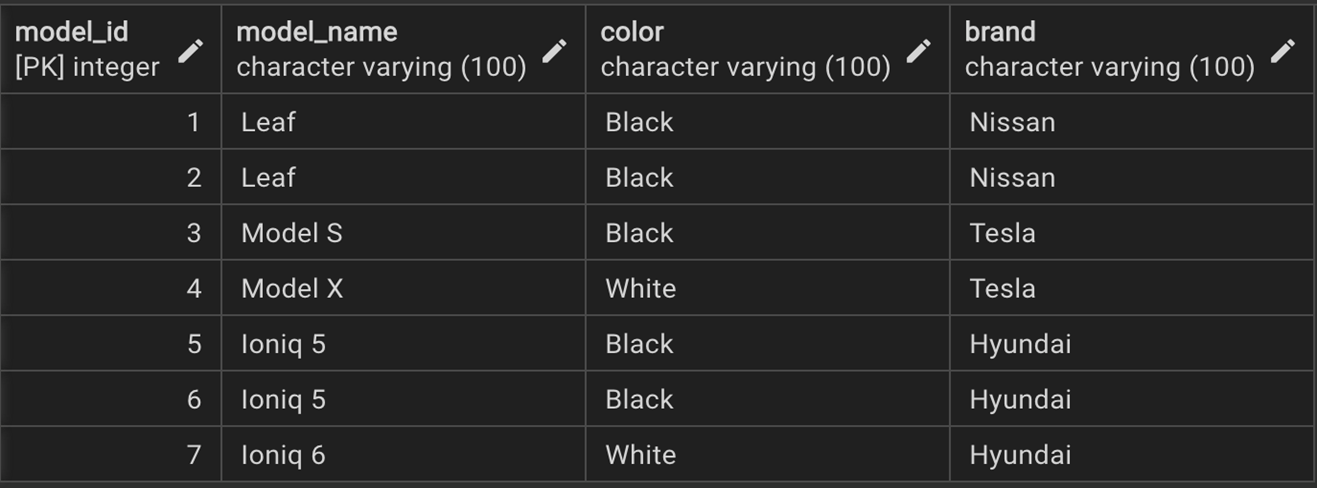

In [33]:
df = pd.read_csv('..\Data\CARS.csv')

In [34]:
df

,model_id,model_name,color,brand
0,1,Leaf,Black,Nissan
1,2,Leaf,Black,Nissan
2,3,Model S,Black,Tesla
3,4,Model X,White,Tesla
4,5,Ioniq 5,Black,Hyundai
5,6,Ioniq 5,Black,Hyundai
6,7,Ioniq 6,White,Hyundai


##### Approach
 Great challenge! We're tackling a classic "remove duplicate rows while keeping the first occurrence" problem.
* 1. Using drop_duplicates() (Closest to SQL GROUP BY MIN())
* 2. Using groupby().first() (SQL GROUP BY model_name, brand, MIN(model_id))
* 3. Using groupby().idxmin() (Finding the index of the min model_id)
* 4. Using duplicated() (Marking duplicates like SQL ROW_NUMBER() > 1)
* 5. Using sort_values() + drop_duplicates() (Ensuring we keep the smallest model_id first)
* 6. Using apply() on groupby() (Applying row-wise transformations)
* 7. Using merge() with a subquery approach (SQL-like INNER JOIN with min model_id)

In [36]:

### 1️⃣ Approach 1: Using drop_duplicates() (Most direct way)
df1 = df.drop_duplicates(subset=["model_name", "brand"], keep="first")

### 2️⃣ Approach 2: Using groupby().first() (Explicitly taking min model_id)
df2 = df.groupby(["model_name", "brand"], as_index=False).first()

### 3️⃣ Approach 3: Using groupby().idxmin() (Index-based filtering)
idx = df.groupby(["model_name", "brand"])["model_id"].idxmin()
df3 = df.loc[idx].sort_values("model_id").reset_index(drop=True)

### 4️⃣ Approach 4: Using duplicated() (Marking non-first duplicates)
df4 = df[~df.duplicated(subset=["model_name", "brand"], keep="first")]

### 5️⃣ Approach 5: Using sort_values() + drop_duplicates() (Sorting first)
df5 = df.sort_values("model_id").drop_duplicates(subset=["model_name", "brand"], keep="first")

### 6️⃣ Approach 6: Using apply() inside groupby() (Row-wise filtering)
df6 = df.loc[df.groupby(["model_name", "brand"])["model_id"].apply(lambda x: x.idxmin())]

### 7️⃣ Approach 7: Using merge() (SQL-like subquery filtering)
min_ids = df.groupby(["model_name", "brand"], as_index=False)["model_id"].min()
df7 = df.merge(min_ids, on=["model_name", "brand", "model_id"])

# Display results (for checking correctness)
print("Approach 1:\n", df1, "\n")
print("Approach 2:\n", df2, "\n")
print("Approach 3:\n", df3, "\n")
print("Approach 4:\n", df4, "\n")
print("Approach 5:\n", df5, "\n")
print("Approach 6:\n", df6, "\n")
print("Approach 7:\n", df7, "\n")


Approach 1:
    model_id model_name  color    brand
0         1       Leaf  Black   Nissan
2         3    Model S  Black    Tesla
3         4    Model X  White    Tesla
4         5    Ioniq 5  Black  Hyundai
6         7    Ioniq 6  White  Hyundai 

Approach 2:
   model_name    brand  model_id  color
0    Ioniq 5  Hyundai         5  Black
1    Ioniq 6  Hyundai         7  White
2       Leaf   Nissan         1  Black
3    Model S    Tesla         3  Black
4    Model X    Tesla         4  White 

Approach 3:
    model_id model_name  color    brand
0         1       Leaf  Black   Nissan
1         3    Model S  Black    Tesla
2         4    Model X  White    Tesla
3         5    Ioniq 5  Black  Hyundai
4         7    Ioniq 6  White  Hyundai 

Approach 4:
    model_id model_name  color    brand
0         1       Leaf  Black   Nissan
2         3    Model S  Black    Tesla
3         4    Model X  White    Tesla
4         5    Ioniq 5  Black  Hyundai
6         7    Ioniq 6  White  Hyundai 

Appr

### Query 2 Display highest and lowest salary
From the given employee table, display the highest and lowest salary corresponding to each department. Return the result corresponding to each employee record

In [37]:
df = pd.read_csv('..\Data\EMPLOYEE.csv')

In [ ]:
df

,id,name,dept,salary
0,1,Alexander,Admin,6500
1,2,Leo,Finance,7000
2,3,Robin,IT,2000
3,4,Ali,IT,4000
4,5,Maria,IT,6000
5,6,Alice,Admin,5000
6,7,Sebastian,HR,3000
7,8,Emma,Finance,4000
8,9,John,HR,4500
9,10,Kabir,IT,8000


#### Approach
🚀 Pandas Approaches
We can solve this in multiple ways, just like SQL:
* Using groupby().transform() (Closest to SQL MAX() OVER (PARTITION BY))
* Using merge() (Mimics CTE + JOIN approach)
* Using groupby().agg() + merge()
* Using apply() inside groupby()
* Using groupby() + idxmax()/idxmin() (Index-based lookup)


In [ ]:
### 1️⃣ Approach 1: Using groupby().transform() (SQL Window Function equivalent)
df1 = df.copy()
df1["highest_sal"] = df1.groupby("dept")["salary"].transform("max")
df1["lowest_sal"] = df1.groupby("dept")["salary"].transform("min")

### 2️⃣ Approach 2: Using merge() (Mimics CTE + JOIN)
dept_stats = df.groupby("dept", as_index=False).agg(highest_sal=("salary", "max"), 
                                                    lowest_sal=("salary", "min"))
df2 = df.merge(dept_stats, on="dept")

### 3️⃣ Approach 3: Using groupby().agg() + merge()
df3 = df.copy()
dept_min_max = df3.groupby("dept")["salary"].agg(["max", "min"]).reset_index()
df3 = df3.merge(dept_min_max, left_on="dept", right_on="dept")

### 4️⃣ Approach 4: Using apply() inside groupby() (Row-wise operations)
df4 = df.copy()
df4["highest_sal"] = df4.groupby("dept")["salary"].apply(lambda x: x.max())
df4["lowest_sal"] = df4.groupby("dept")["salary"].apply(lambda x: x.min())

### 5️⃣ Approach 5: Using idxmax()/idxmin() for index-based lookup
df5 = df.copy()
idx_max = df5.groupby("dept")["salary"].idxmax()
idx_min = df5.groupby("dept")["salary"].idxmin()
df5["highest_sal"] = df5["dept"].map(df5.loc[idx_max].set_index("dept")["salary"])
df5["lowest_sal"] = df5["dept"].map(df5.loc[idx_min].set_index("dept")["salary"])

# Display results (to verify correctness)
print("Approach 1:\n", df1, "\n")
print("Approach 2:\n", df2, "\n")
print("Approach 3:\n", df3, "\n")
print("Approach 4:\n", df4, "\n")
print("Approach 5:\n", df5, "\n")


Approach 1:
    id       name     dept  salary  highest_sal  lowest_sal
0   1  Alexander    Admin    6500         6500        5000
1   2        Leo  Finance    7000         7000        4000
2   3      Robin       IT    2000         8000        2000
3   4        Ali       IT    4000         8000        2000
4   5      Maria       IT    6000         8000        2000
5   6      Alice    Admin    5000         6500        5000
6   7  Sebastian       HR    3000         4500        3000
7   8       Emma  Finance    4000         7000        4000
8   9       John       HR    4500         4500        3000
9  10      Kabir       IT    8000         8000        2000 

Approach 2:
    id       name     dept  salary  highest_sal  lowest_sal
0   1  Alexander    Admin    6500         6500        5000
1   2        Leo  Finance    7000         7000        4000
2   3      Robin       IT    2000         8000        2000
3   4        Ali       IT    4000         8000        2000
4   5      Maria       IT   

### Query 3 Find actual distance
From the given cars_travel table, find the actual distance travelled by each car corresponding to each day
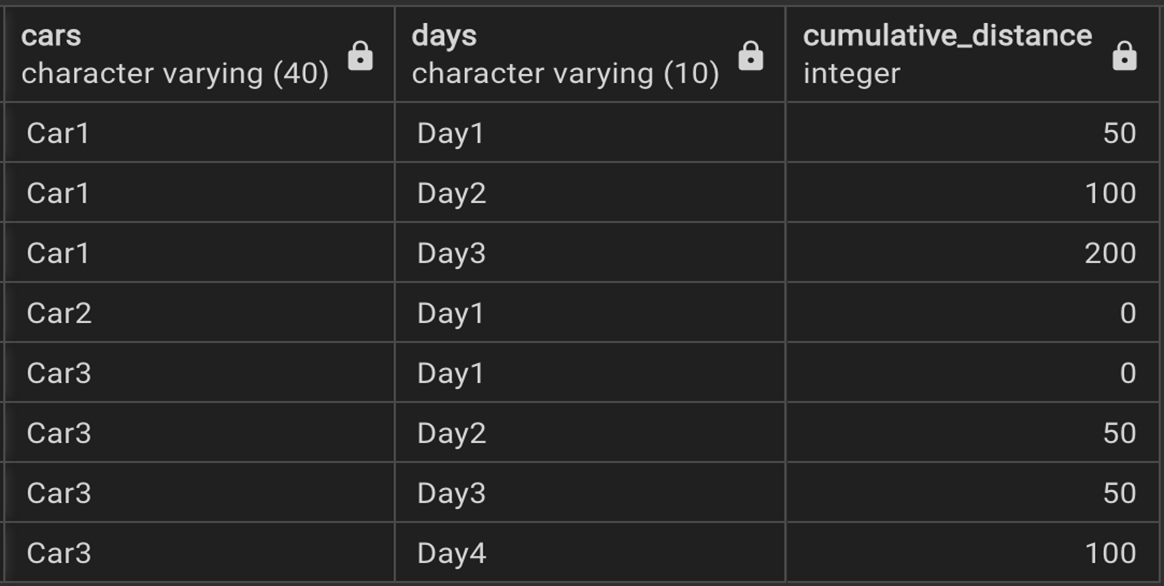

In [45]:
df = pd.read_csv('..\Data\car_travels.csv')

In [43]:
df

,cars,days,cumulative_distance
0,Car1,Day1,50
1,Car1,Day2,100
2,Car1,Day3,200
3,Car2,Day1,0
4,Car3,Day1,0
5,Car3,Day2,50
6,Car3,Day3,50
7,Car3,Day4,100


In [46]:

# Approach 1: Using diff() (Best Performance)
df1 = df.copy()
df1['distance_travelled_diff'] = df.groupby('cars')['cumulative_distance'].diff().fillna(0)
print(df1)

   cars  days  cumulative_distance  distance_travelled_diff
0  Car1  Day1                   50                      0.0
1  Car1  Day2                  100                     50.0
2  Car1  Day3                  200                    100.0
3  Car2  Day1                    0                      0.0
4  Car3  Day1                    0                      0.0
5  Car3  Day2                   50                     50.0
6  Car3  Day3                   50                      0.0
7  Car3  Day4                  100                     50.0


In [50]:

# Approach 2: Using shift() (SQL-style LAG equivalent)
df2 = df.copy()
df2['distance_travelled_shift'] = df['cumulative_distance'] - df.groupby('cars')['cumulative_distance'].shift(1).fillna(0)
print(df2)

   cars  days  cumulative_distance  distance_travelled_shift
0  Car1  Day1                   50                      50.0
1  Car1  Day2                  100                      50.0
2  Car1  Day3                  200                     100.0
3  Car2  Day1                    0                       0.0
4  Car3  Day1                    0                       0.0
5  Car3  Day2                   50                      50.0
6  Car3  Day3                   50                       0.0
7  Car3  Day4                  100                      50.0


In [52]:

# Approach 3: Using apply() (Slowest but Flexible)
df3 = df.copy()
df3['distance_travelled_apply'] = df3.groupby('cars')['cumulative_distance'].apply(lambda x: x - x.shift(1)).fillna(0)
print(df3)


TypeError: incompatible index of inserted column with frame index

### Query 7 (write a query to fetch the results into a desired format.)
Given data in sales.csv derive desired format as:
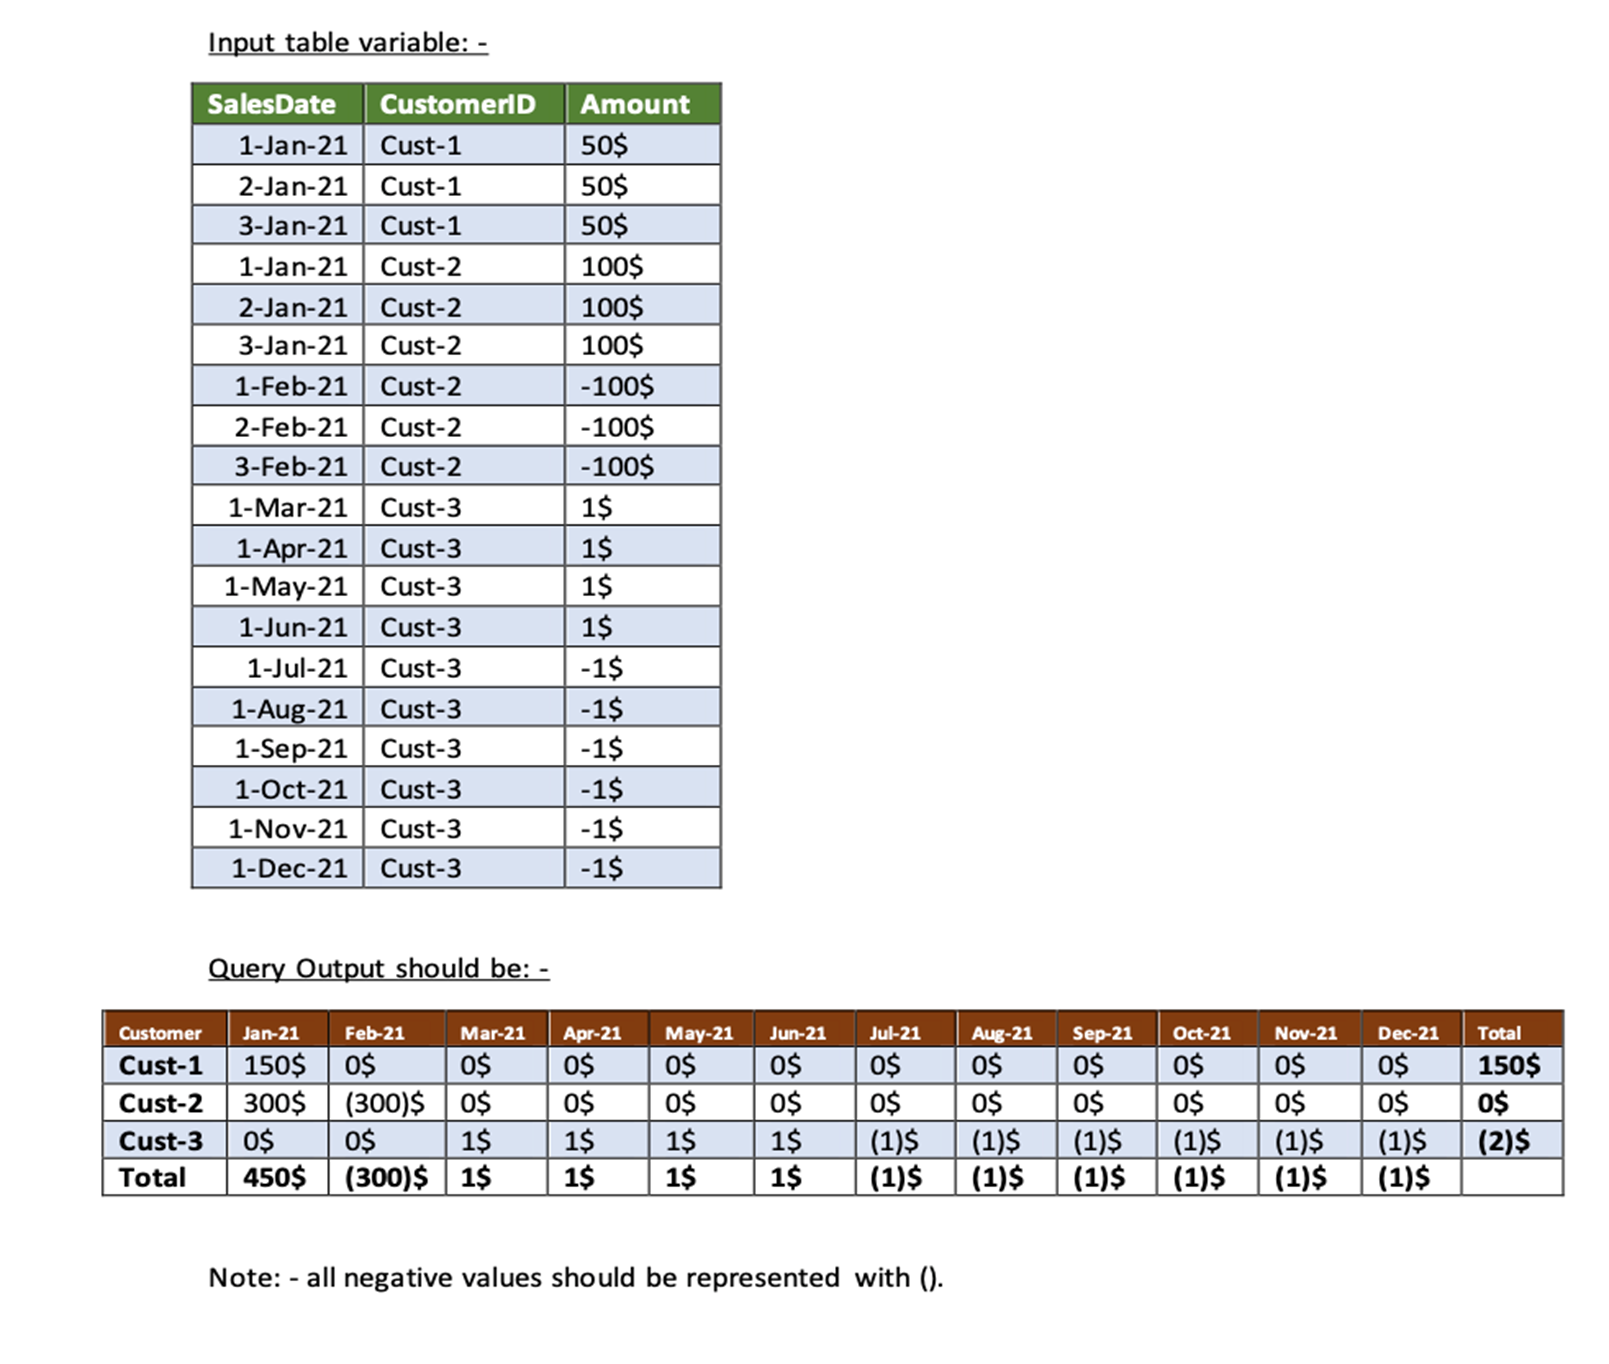

In [ ]:
import pandas as pd

In [ ]:
sales_data = pd.read_csv('..\Data\sales_data.csv')

In [ ]:
sales_data

,sales_date,customer_id,amount
0,2021-01-01,Cust-1,50$
1,2021-01-02,Cust-1,50$
2,2021-01-03,Cust-1,50$
3,2021-01-01,Cust-2,100$
4,2021-01-02,Cust-2,100$
5,2021-01-03,Cust-2,100$
6,2021-02-01,Cust-2,-100$
7,2021-02-02,Cust-2,-100$
8,2021-02-03,Cust-2,-100$
9,2021-03-01,Cust-3,1$


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sales_date   19 non-null     object
 1   customer_id  19 non-null     object
 2   amount       19 non-null     object
dtypes: object(3)
memory usage: 588.0+ bytes


In [ ]:
# Cleanising dataframe for processing
sales_data.sales_date = pd.to_datetime(sales_data.sales_date, format= '%Y-%m-%d').dt.strftime('%b-%y')
sales_data.amount = sales_data['amount'].replace('\$', '', regex= True).astype(float)
sales_data.head()

,sales_date,customer_id,amount
0,Jan-21,Cust-1,50.0
1,Jan-21,Cust-1,50.0
2,Jan-21,Cust-1,50.0
3,Jan-21,Cust-2,100.0
4,Jan-21,Cust-2,100.0


In [ ]:
# Group by and aggregation for desired results
sales_summary = sales_data.groupby(by= ['sales_date','customer_id']).sum().reset_index()

In [ ]:
sales_summary

,sales_date,customer_id,amount
0,Apr-21,Cust-3,1.0
1,Aug-21,Cust-3,-1.0
2,Dec-21,Cust-3,-1.0
3,Feb-21,Cust-2,-300.0
4,Jan-21,Cust-1,150.0
5,Jan-21,Cust-2,300.0
6,Jul-21,Cust-3,-1.0
7,Jun-21,Cust-3,1.0
8,Mar-21,Cust-3,1.0
9,May-21,Cust-3,1.0


In [ ]:
sales_summary_pivot = sales_summary.pivot_table(index= 'customer_id', columns= 'sales_date', values= 'amount', aggfunc=sum, fill_value= 0)

In [ ]:
sales_summary_pivot['total'] = sales_summary_pivot.sum(axis=1)
sales_summary_pivot.loc['Total'] = sales_summary_pivot.sum()
sales_summary_pivot

sales_date,Apr-21,Aug-21,Dec-21,Feb-21,Jan-21,Jul-21,Jun-21,Mar-21,May-21,Nov-21,Oct-21,Sep-21,total
customer_id,,,,,,,,,,,,,
Cust-1,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0
Cust-2,0.0,0.0,0.0,-300.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cust-3,1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-2.0
Total,1.0,-1.0,-1.0,-300.0,450.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,148.0


In [ ]:
sales_summary_pivot.applymap(lambda x: f"{x:.0f}$")

sales_date,Apr-21,Aug-21,Dec-21,Feb-21,Jan-21,Jul-21,Jun-21,Mar-21,May-21,Nov-21,Oct-21,Sep-21,total
customer_id,,,,,,,,,,,,,
Cust-1,0$,0$,0$,0$,150$,0$,0$,0$,0$,0$,0$,0$,150$
Cust-2,0$,0$,0$,-300$,300$,0$,0$,0$,0$,0$,0$,0$,0$
Cust-3,1$,-1$,-1$,0$,0$,-1$,1$,1$,1$,-1$,-1$,-1$,-2$
Total,1$,-1$,-1$,-300$,450$,-1$,1$,1$,1$,-1$,-1$,-1$,148$


#### Pandas vectorization functions: apply, applymap, map

apply works on a row / column basis of a DataFrame

applymap works element-wise on a DataFrame

map works element-wise on a Series

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.014631,1.216336,-0.120557
Ohio,-2.608202,-1.077131,0.975445
Texas,-1.330085,-0.056753,-0.117207
Oregon,-0.554516,-0.180309,-0.987460


In [ ]:
# Defining anonymous function to calculate range of some collections of number
f = lambda x: x.max() - x.min()

In [ ]:
frame.apply(f)

b    3.622834
d    2.293467
e    1.962905
dtype: float64

In [ ]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,1.01,1.22,-0.12
Ohio,-2.61,-1.08,0.98
Texas,-1.33,-0.06,-0.12
Oregon,-0.55,-0.18,-0.99


In [ ]:
frame['e'].map(format)

Utah      -0.12
Ohio       0.98
Texas     -0.12
Oregon    -0.99
Name: e, dtype: object